<a href="https://colab.research.google.com/github/shu-nya/Netflix-movies-and-TV-shows-Clustering/blob/master/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

##Import the libraries

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

##Import the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Project datasets/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

##Understanding the dataset

In [4]:
# first 5 rows in the dataset

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# number of rows and columns in the dataset

df.shape

(7787, 12)

###Observations:

1. The dataset contains 7787 records of 11 features.

2. The first column is for index.

In [6]:
# statistical description of the features in the dataset

df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [7]:
# summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# number of unique elements in each feature

df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

##Cleaning the data

###Checking for Duplicate rows

In [9]:
# count of the boolean values for duplicated records

df.duplicated().value_counts()

False    7787
dtype: int64

###Observations:

1. There are no duplicated records in the dataset.

## Checking for Missing Values

In [10]:
# missing values in the dataset

df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

###Observations:

1. There are many missing values in director, cast, country, date_added, and rating columns.

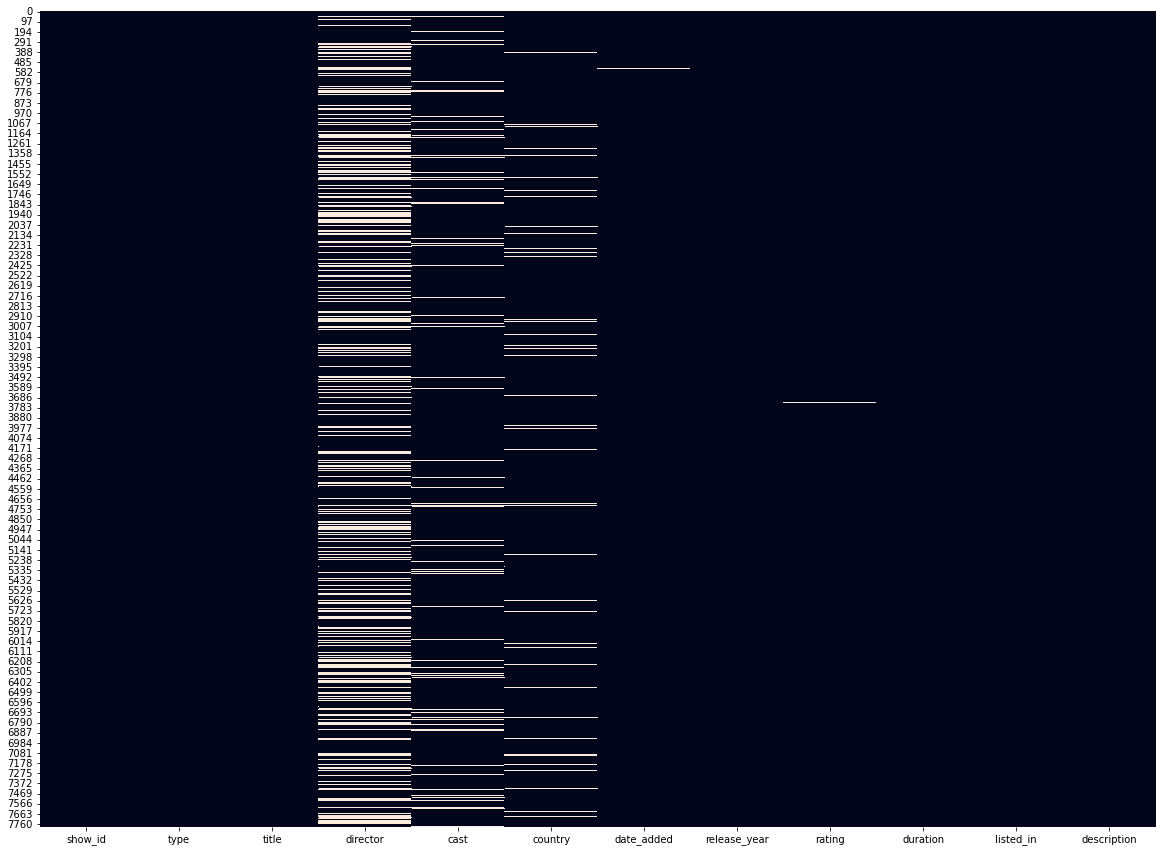

In [11]:
# visualizing the missing values in each feature using the Heatmap

plt.figure(figsize=(20,15))
sns.heatmap(df.isnull(), cbar=False)

## Handling the Missing values

###Observations:

1. The missing values in the director, cast, and country attributes can be replaced with 'Unknown'.

2. The missing values in rating can be imputed with its mode, since this attribute is discrete.

3. 10 records with missing values in the date_added column can be dropped.

In [12]:
# missing values in the director, cast, and country attributes are replaced with 'Unknown'

df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')

In [13]:
# missing values in rating are imputed with its mode, since this attribute is discrete.

df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [14]:
# 10 records with missing values in the date_added column are dropped.

df.dropna(axis=0, inplace = True)

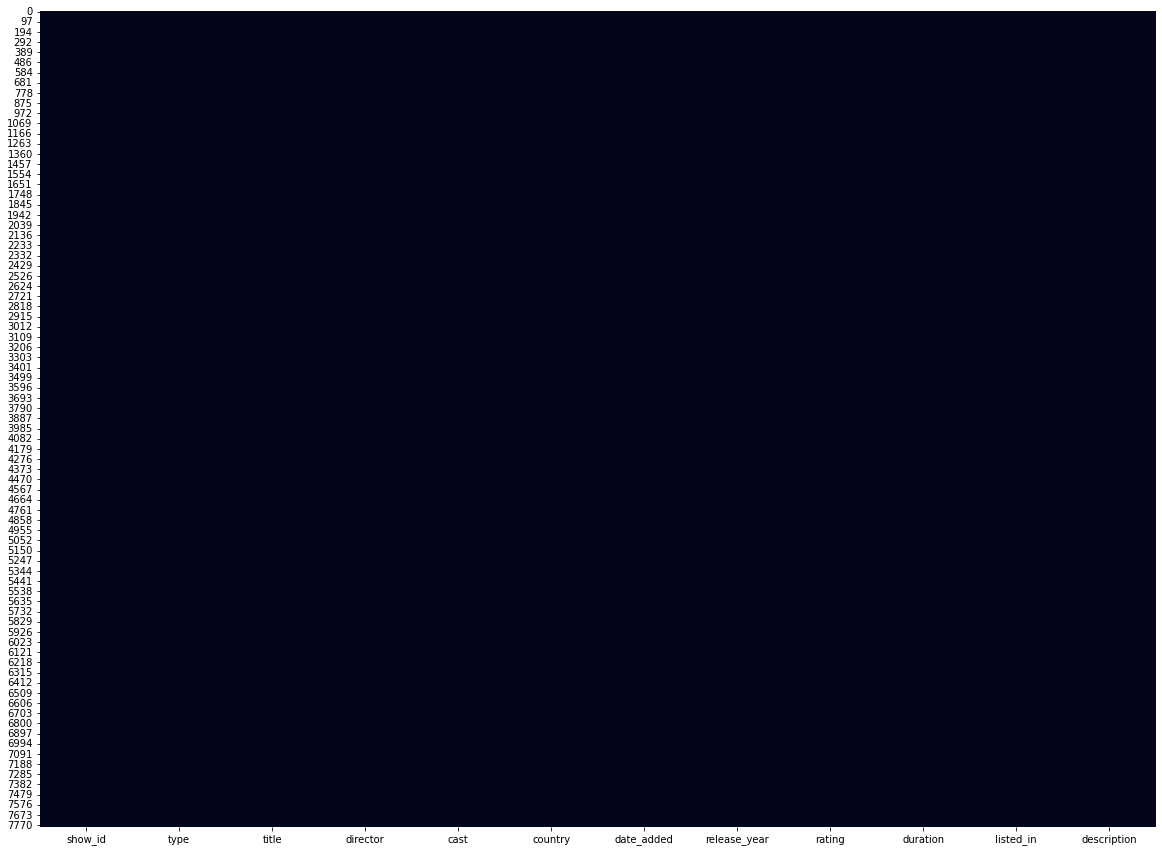

In [15]:
# visualizing the missing values in each feature using the Heatmap

plt.figure(figsize=(20,15))
sns.heatmap(df.isnull(), cbar=False)

In [16]:
df.shape

(7777, 12)

###Observations:

1. Successfully handled all the missing values in the dataset.

##Feature Country:

In [17]:
# first 5 rows in country

df.country.head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: country, dtype: object

In [18]:
# count of each country in the dataset

df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

###Observations:

1. Some movies/TV shows have been filmed in multiple countries.

2. This makes the analysis cumbersome.

3. To simplify the analysis, considering only the primary country associated to the respective movies/TV shows.

In [19]:
# considering only the primary Country for each movie/TV show

df['country'] = df['country'].apply(lambda x: x.split(',')[0])

In [20]:
# again checking the top countries

df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

##Feature listed_in: 

In [21]:
# first 5 rows in listed_in

df.listed_in.head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

In [22]:
# count of each genre movies/TV shows are listed_in

df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

###Observations:

1. Some movies/TV shows have multiple genres.

2. This makes the analysis cumbersome.

3. To simplify the analysis, considering only the primary genres associated to the respective movies/TV shows.

In [23]:
# considering only the primary genre each movie/TV show is listed_in

df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [24]:
# again checking the top genres

df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

##Feature Duration

In [25]:
# first 5 rows in duration

df.duration.head()

0    4 Seasons
1       93 min
2       78 min
3       80 min
4      123 min
Name: duration, dtype: object

###Observations:

1. Datatype of Duration is object.

2. Convert it to int.

In [26]:
# converting the datatype of duration from object to int

df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [27]:
# datatype of duration

df.duration.dtype

dtype('int64')

In [28]:
# number of seasons for tv shows

df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [29]:
# movie length in minutes

df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

##Feature date_added

In [30]:
# first 5 rows in date_added

df.date_added.head()

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
3    November 16, 2017
4      January 1, 2020
Name: date_added, dtype: object

###Observations:

1. Datatype of date_added is object.

2. Convert it to datetime.

3. Extract the attributes month and year from date_added.

In [31]:
# converting the datatype of date_added from object to datetime

df["date_added"] = pd.to_datetime(df['date_added'])

In [32]:
# first and last day on which a show was added on Netflix

df.date_added.min(), df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [33]:
# extracting the attribute month

df['month_added'] = df['date_added'].dt.month

In [34]:
# extracting the attribute year

df['year_added'] = df['date_added'].dt.year

In [35]:
# dropping the attribute date_added

df.drop('date_added', axis=1, inplace=True)

##Feature Rating

In [36]:
# first 5 rows in rating

df.rating.head()

0    TV-MA
1    TV-MA
2        R
3    PG-13
4    PG-13
Name: rating, dtype: object

###Observations:

1. The ratings can be changed to age restrictions that apply on certain movies and TV shows.

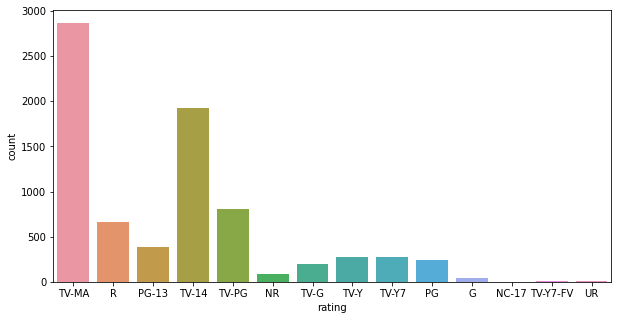

In [37]:
# countplot for age ratings for shows in the dataset

plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

###Observations:

1. Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG

In [38]:
# age ratings

df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [39]:
# changing the values in the rating column

rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

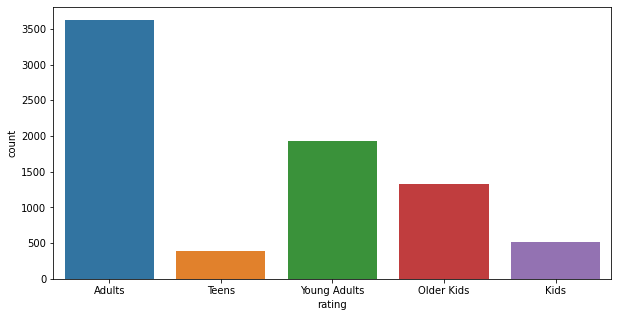

In [40]:
# countplot for Age ratings for shows in the dataset

plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

###Observations:

1. Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. 

2. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

##Exploratory Data Analysis

###Univariate Analysis

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

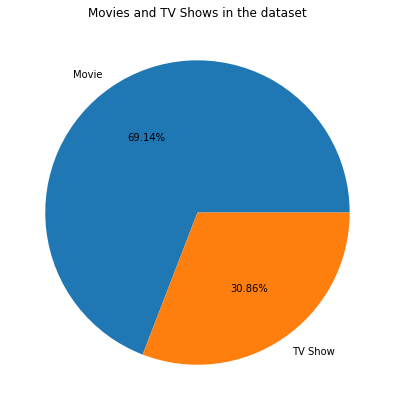

In [41]:
# number of Movies and TV Shows in the dataset

plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

###Observations:

1. There are more movies (69.14%) than TV shows (30.86%) in the dataset.

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

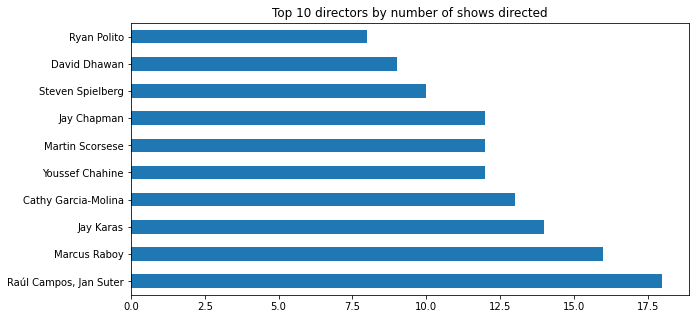

In [42]:
# top 10 directors in the dataset.

plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

###Observations:

1. Raul Campos and Jan Suter together have directed 18 movies/TV shows, higher than anyone in the dataset.

Text(0.5, 1.0, 'Top 10 countries with the highest number of shows')

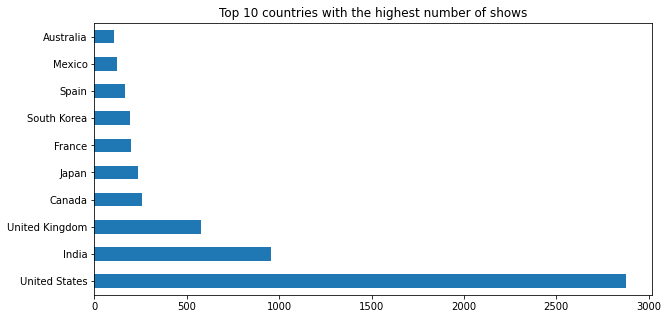

In [43]:
# top 10 countries with the highest number of movies/TV shows in the dataset

plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 countries with the highest number of shows')

###Observations:

1. The highest number of movies/TV shows were based out of the US, followed by India and UK.

In [44]:
# percentage of movies/tv shows by top 3 countries

df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [45]:
# percentage of movies/tv shows by top 10 countries

df.country.value_counts().nlargest(10).sum()/len(df)*100

78.32068921177832

###Observations:

1. The top 3 countries together account for about 56% of all movies and TV shows in the dataset.

2. This value increases to about 78% for top ten countries.

Text(0.5, 1.0, 'distribution by released year')

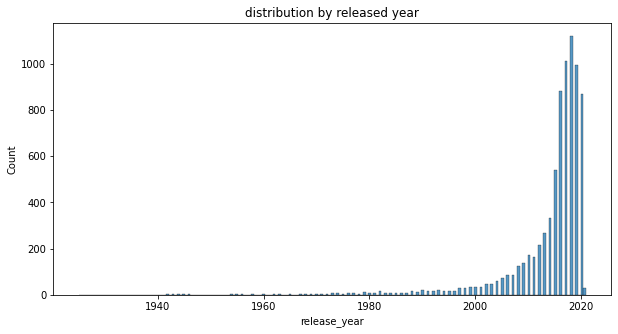

In [46]:
# visualizing the year in which the movie/tv show was released

plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

###Observations:

1. Netflix has more number of new movies/TV shows than the old ones.

Text(0.5, 1.0, 'Top 10 genres')

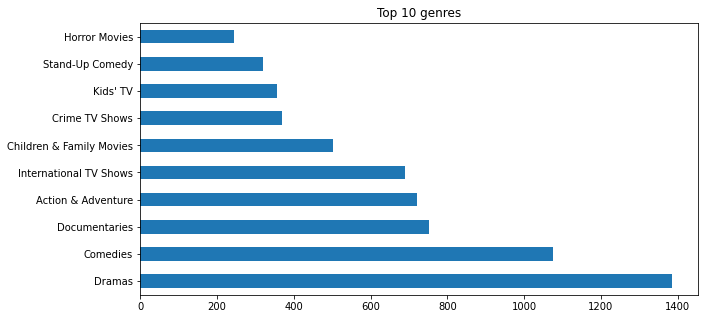

In [47]:
# visualizing the top 10 genres

plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

In [48]:
# share of the top 3 genres

df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [49]:
# share of the top 10 genres

df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

###Observations:

1. The dramas is the most popular genre followed by comedies and documentaries.

2. These three genres account for about 41% of all movies and TV shows.

3. This value increases to about 82% for top 10 genres.

Text(0.5, 0, '')

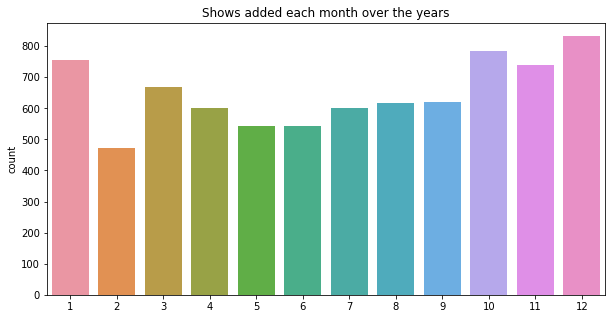

In [50]:
# number of shows added in different months

plt.figure(figsize = (10,5)) 
sns.countplot(df['month_added'])
plt.title('Shows added each month over the years')
plt.xlabel('')

###Observations:

1. Over the years a greater number of shows were added in the months of October, November, December, and January.

Text(0.5, 0, '')

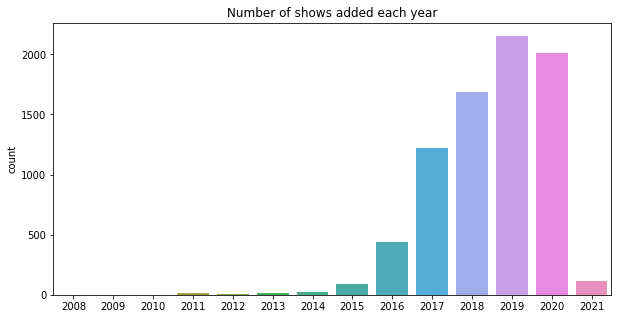

In [51]:
# number of shows added in each year

plt.figure(figsize = (10,5)) 
sns.countplot(df['year_added'])
plt.title('Number of shows added each year')
plt.xlabel('')

###Observations:

1. Netflix continuous to add more shows on its platform over the years.

2. There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.

3. We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

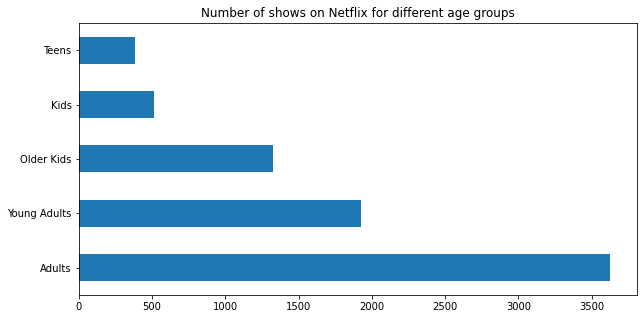

In [52]:
# number of shows on Netflix for different age groups

plt.figure(figsize=(10,5))
df.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')

###Observations:

1. The majority of the shows on Netflix are catered to the needs of adult and young adult population.

##Bivariate analysis

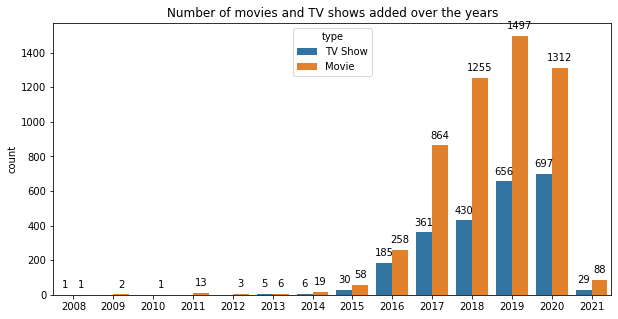

In [53]:
# number of movies and TV shows added over the years

plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

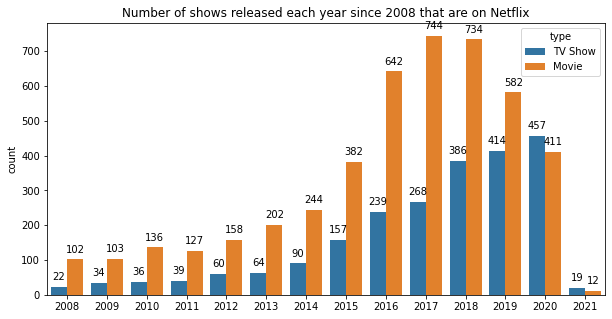

In [54]:
# number of shows released each year since 2008

order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

###Observations:

1. Over the years, Netflix has consistently focused on adding more shows in its platform.

2. Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.

3. This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

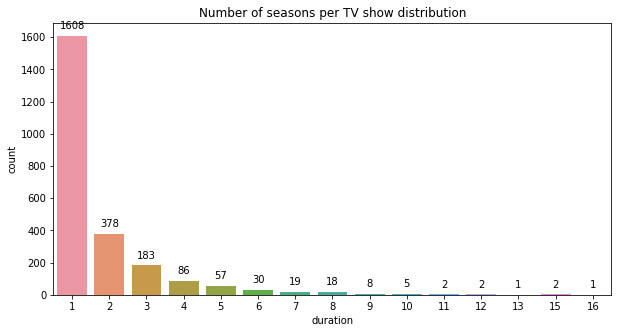

In [55]:
# seasons in each TV show

plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [56]:
# percentage of tv shows with just 1 season

len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])* 100

67.0

###Observations:

1. The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.

2. There are very few TV shows that have more than 8 seasons.

Text(0.5, 1.0, 'Movie duration distribution')

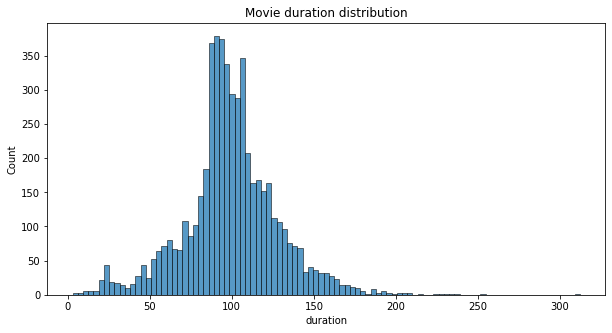

In [57]:
# length of movie analysis

plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [58]:
# movie statistics

df[df['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

###Observations:

1. The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

Text(0.5, 0, 'Year')

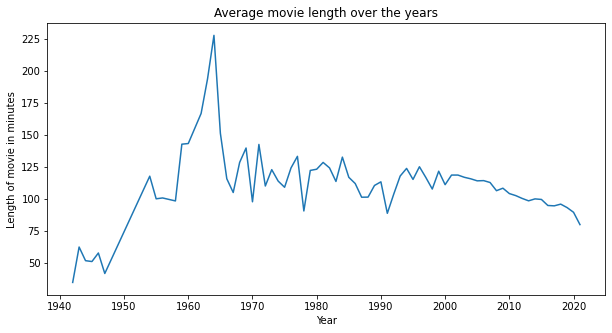

In [59]:
# average movie length over the years

plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

In [60]:
# movie release year statistics

df[df['type']== 'Movie'].release_year.describe()

count    5377.000000
mean     2012.920030
std         9.663282
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

###Observations:

1. Netflix has several movies on its site, including those that were released in way back 1942.

2. As per the plot, movies made in the 1940s had a fairly short duration on average.

3. On an average, movies made in the 1960s have the longest movie length.

4. The average length of a movie has been continuously decreasing since the 2000s.

Text(0.5, 1.0, 'Top 10 genres for movies')

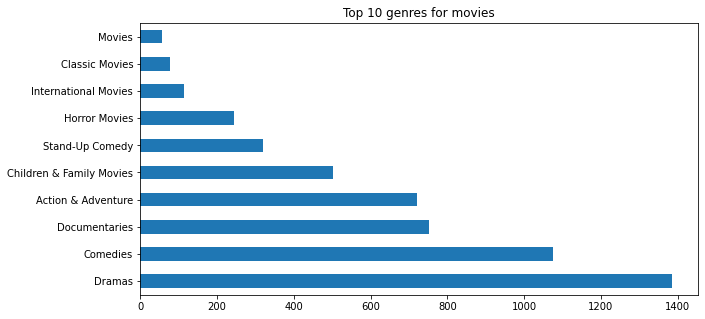

In [61]:
# top 10 genre for movies

plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

###Observations:

1. Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

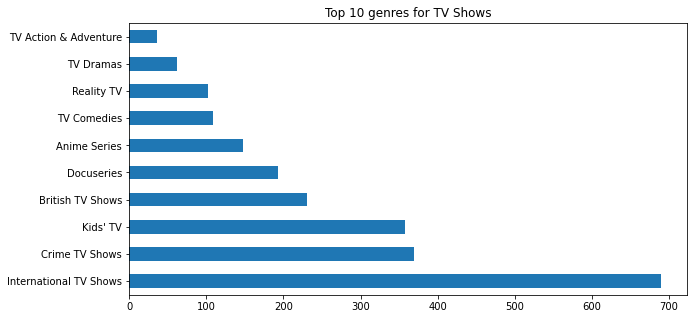

In [62]:
# top 10 genre for tv shows

plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

###Observations:

1. International, crime, and kids are the most popular genre for TV shows on Netflix.

Text(0.5, 1.0, 'Top 10 movie directors')

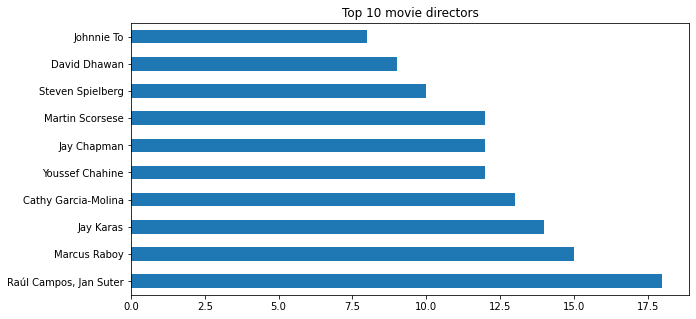

In [63]:
# top 10 movie directors

plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

###Observations:

1. Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.

2. This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina

Text(0.5, 1.0, 'Top 10 TV show directors')

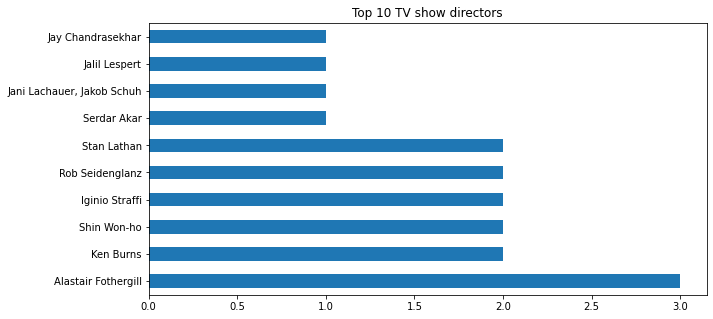

In [64]:
# top 10 TV show directors

plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

###Observations:

1. Alastair Fothergill has directed three TV shows, the most of any director.

2. Only six directors have directed more than one television show.

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

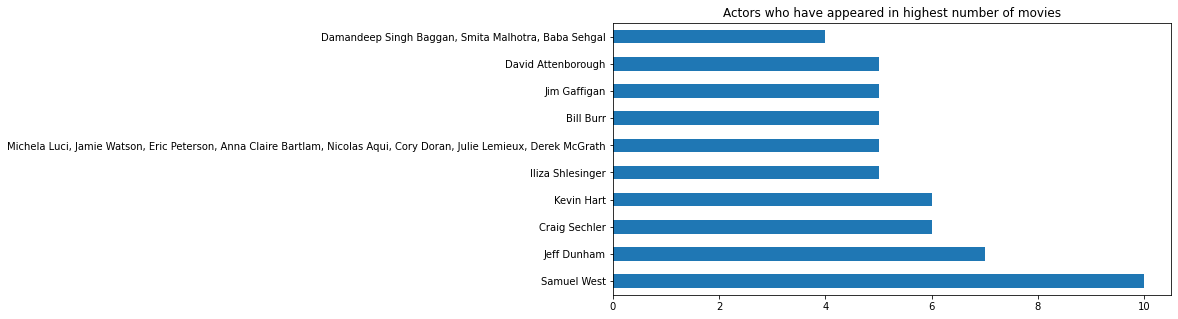

In [65]:
# top actors for movies

plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

###Observations:

1. Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7 movies.

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

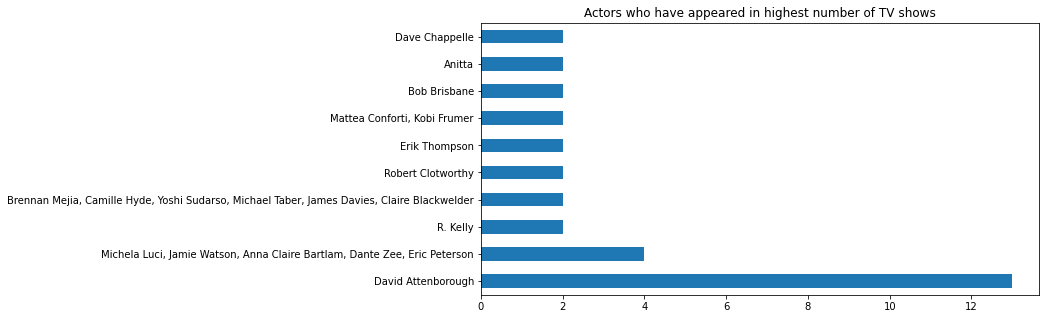

In [66]:
# top actors for TV shows

plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

###Observations:

1. David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.